In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lish-moa/train_targets_scored.csv
/kaggle/input/lish-moa/sample_submission.csv
/kaggle/input/lish-moa/train_drug.csv
/kaggle/input/lish-moa/train_targets_nonscored.csv
/kaggle/input/lish-moa/train_features.csv
/kaggle/input/lish-moa/test_features.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


*****Loading data*****

In [3]:
data_path = "/kaggle/input/lish-moa/"
train_features = pd.read_csv(data_path + 'train_features.csv')
scored = pd.read_csv(data_path + 'train_targets_scored.csv')
non_scored=pd.read_csv(data_path + 'train_targets_nonscored.csv')
drug=pd.read_csv(data_path + 'train_drug.csv')
test = pd.read_csv(data_path + 'test_features.csv')
sample_submission = pd.read_csv(data_path + 'sample_submission.csv')


**show the data & data information**

In [4]:
print("Train Data: ")
print("Shape:"+str(train_features.shape))
train_features.head(5)

Train Data: 
Shape:(23814, 876)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [5]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 159.2+ MB


In [6]:
print("Targets Scored: ")
print("Shape:"+str(scored.shape))
scored.head(5)



Targets Scored: 
Shape:(23814, 207)


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, sig_id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [8]:
print("Targets NonScored: ")
print("Shape:"+str(non_scored.shape))
non_scored.head(5)

Targets NonScored: 
Shape:(23814, 403)


,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
non_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 403 entries, sig_id to xiap_inhibitor
dtypes: int64(402), object(1)
memory usage: 73.2+ MB


In [10]:
print("Drug: ")
print("Shape:"+str(drug.shape))
drug.head(5)

Drug: 
Shape:(23814, 2)


,sig_id,drug_id
0,id_000644bb2,b68db1d53
1,id_000779bfc,df89a8e5a
2,id_000a6266a,18bb41b2c
3,id_0015fd391,8c7f86626
4,id_001626bd3,7cbed3131


In [11]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sig_id   23814 non-null  object
 1   drug_id  23814 non-null  object
dtypes: object(2)
memory usage: 372.2+ KB


**Check Missing Values**

In [12]:
print("Training missing data:", train_features.isnull().sum().sum())
print("Testing missing data:", test.isnull().sum().sum())
print("Target missing data:", scored.isnull().sum().sum())

Training missing data: 0
Testing missing data: 0
Target missing data: 0


**check for duplicates**

In [13]:

print("Training duplicated data:", train_features.duplicated().sum())
print("Testing duplicated data:", test.duplicated().sum())
print("Target duplicated data:", scored.duplicated().sum())

Training duplicated data: 0
Testing duplicated data: 0
Target duplicated data: 0


**Show theGene expression &cell viability coloumns number**

In [14]:
train_gs = train_features.iloc[:,train_features.columns.map(lambda x: x[0:2])=='g-']
train_cs = train_features.iloc[:,train_features.columns.map(lambda x: x[0:2])=='c-']
print("Gene expression data Number of columns: "+str(train_gs.shape[1]))
print("cell viability data Number of columns: "+ str(train_cs.shape[1]))

Gene expression data Number of columns: 772
cell viability data Number of columns: 100


In [15]:
train_features.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


Mean:-0.04159144267345628
Std:1.3373293370712143


Text(0.5, 1.0, 'c-80')

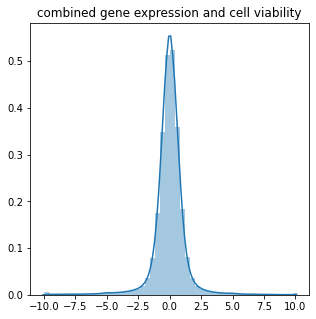

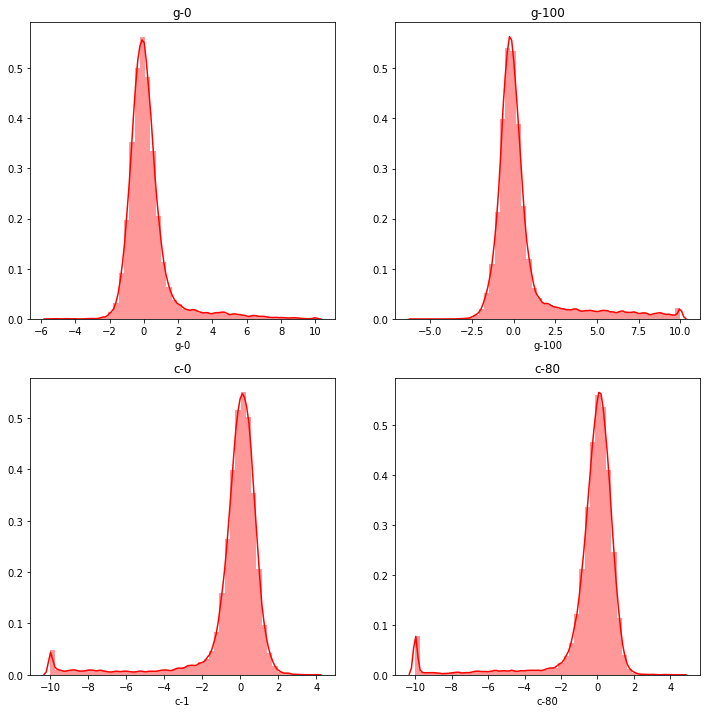

In [16]:
print("Mean:"+str(pd.concat([train_gs,train_cs],axis=1).values.mean()))
print("Std:"+str(pd.concat([train_gs,train_cs],axis=1).values.std()))
plt.figure(figsize=(5,5))
sns.distplot(pd.concat([train_gs,train_cs],axis=1).values)
plt.title('combined gene expression and cell viability')
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.distplot(train_gs['g-0'],color='red')
plt.title('g-0')
plt.subplot(2,2,2)
sns.distplot(train_gs['g-100'],color='red')
plt.title('g-100')
plt.subplot(2,2,3)
sns.distplot(train_cs['c-1'],color='red')
plt.title('c-0')
plt.subplot(2,2,4)
sns.distplot(train_cs['c-80'],color='red')
plt.title('c-80')

**Gene expression & Cell viability statistics**

In [17]:
print("Gene expression data statistics: ")
print("  Mean: "+str(train_gs.values.mean()))
print("  Std: "+str(train_gs.values.std()))
print("  Max: "+str(train_gs.values.max()))
print("  Min: "+str(train_gs.values.min()))
print('\nCell viability data statistics: ')
print("  Mean: "+str(train_cs.values.mean()))
print("  Std: "+str(train_cs.values.std()))
print("  Max: "+str(train_cs.values.max()))
print("  Min: "+str(train_cs.values.min()))

Gene expression data statistics: 
  Mean: 0.009009573150247757
  Std: 1.2360865758425026
  Max: 10.0
  Min: -10.0

Cell viability data statistics: 
  Mean: -0.43223128483245143
  Std: 1.9045866307399681
  Max: 6.412
  Min: -10.0


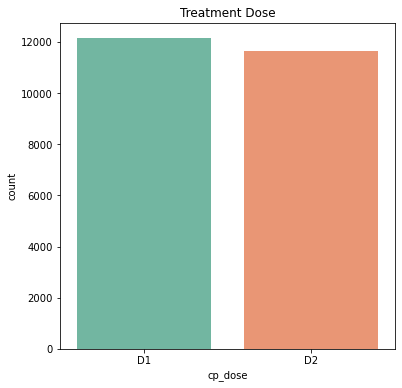

In [18]:
plt.figure(figsize=(6,6))
ax = sns.countplot(train_features["cp_dose"] , palette="Set2")
ax.set_title("Treatment Dose")


plt.show()



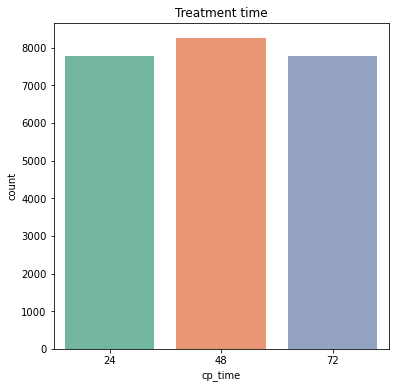

In [19]:
plt.figure(figsize=(6,6))
ax = sns.countplot(train_features["cp_time"] , palette="Set2")
ax.set_title("Treatment time")


plt.show()

Text(0.5, 1.0, 'Treatment Type')

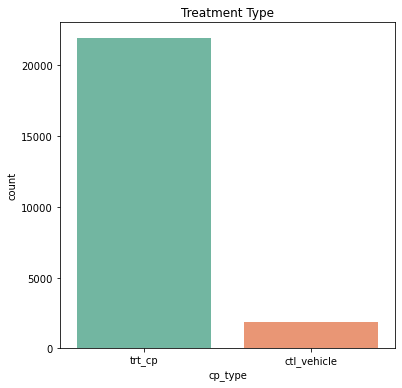

In [20]:
plt.figure(figsize=(6,6))
ax = sns.countplot(train_features["cp_type"] , palette="Set2")
ax.set_title("Treatment Type")


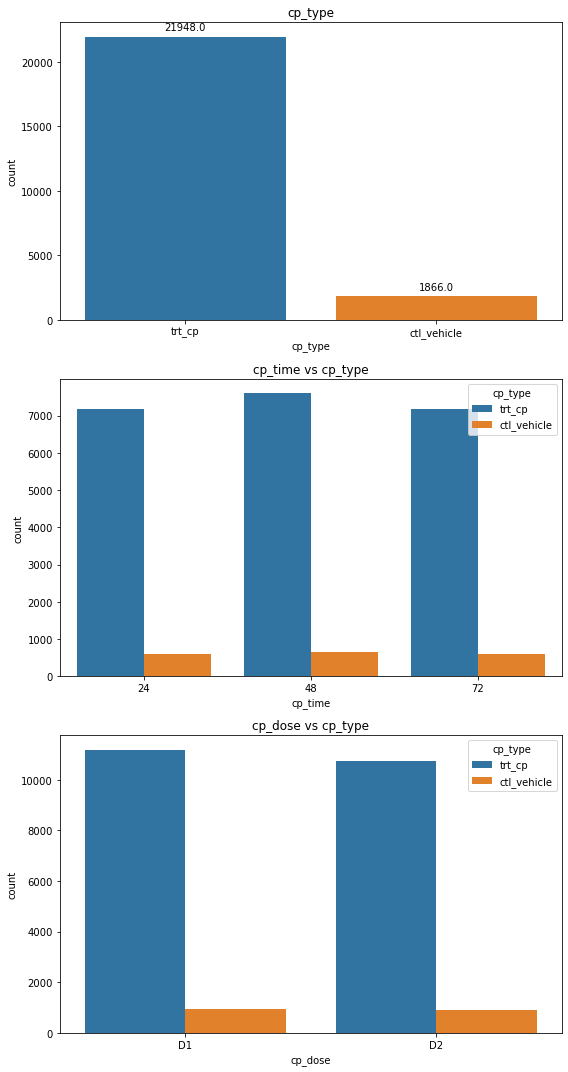

In [21]:
plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
splot = sns.countplot(train_features["cp_type"])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('cp_type')
plt.subplot(3,1,2)
sns.countplot(train_features['cp_time'],hue=train_features['cp_type'])
plt.title('cp_time vs cp_type')
plt.subplot(3,1,3)
sns.countplot(train_features['cp_dose'],hue=train_features['cp_type'])
plt.title('cp_dose vs cp_type')
plt.tight_layout()

In [22]:
print("Number of scored targets: "+str(scored.shape[1]))

Number of scored targets: 207


**Exploring some relationships**

we can use stripplot to show the relationship of a feature and a target with respect to dosage and time.

Text(0.5, 1.0, 'Percentage of samples with MoA counts')

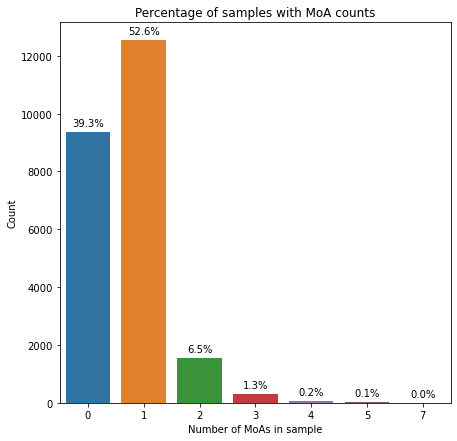

In [23]:
out = dict()
arr=scored.drop('sig_id',axis=1).values==1
for a in range(len(arr)):
    o=np.sum(arr[a])
    if o not in out.keys():
        out[o]=1
    else:
        out[o]+=1
length = 23814
plt.figure(figsize=(7,7))
splot = sns.barplot(x=list(out.keys()),y=list(out.values()))
for p in splot.patches:
    splot.annotate(format(p.get_height()*100/length, '.1f')+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Number of MoAs in sample')
plt.ylabel('Count')
plt.title('Percentage of samples with MoA counts')

In [24]:
cor = scored.drop('sig_id',axis=1).corr()

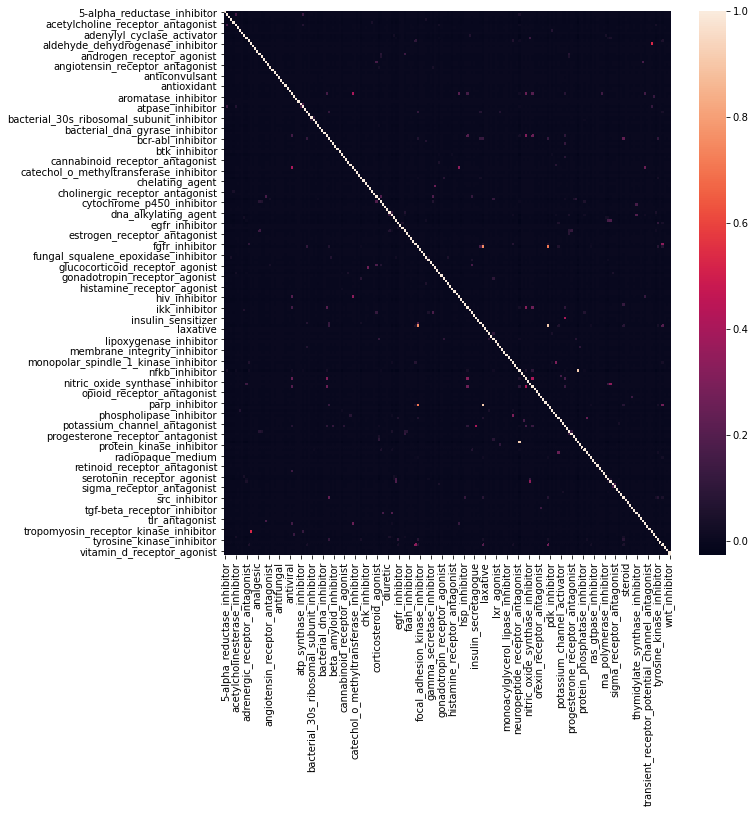

In [25]:
cor = scored.drop('sig_id',axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor)

In [26]:
df = pd.DataFrame(columns=['drug_a','drug_b','corr'])
for j in range(len(cor)):
    for i in range(len(cor)):
        if cor.iloc[i,j]>=0.7 and cor.iloc[i,j]!=1.0:
            df = pd.concat([df,pd.DataFrame({'drug_a':[cor.columns[j]],'drug_b':[cor.columns[i]],'corr':[cor.iloc[i,j]]})],axis=0)
df

,drug_a,drug_b,corr
0,flt3_inhibitor,kit_inhibitor,0.758112
0,flt3_inhibitor,pdgfr_inhibitor,0.705119
0,kit_inhibitor,flt3_inhibitor,0.758112
0,kit_inhibitor,pdgfr_inhibitor,0.915603
0,nfkb_inhibitor,proteasome_inhibitor,0.921340
0,pdgfr_inhibitor,flt3_inhibitor,0.705119
0,pdgfr_inhibitor,kit_inhibitor,0.915603
0,proteasome_inhibitor,nfkb_inhibitor,0.921340


In [27]:
print("Number of non scored targets: "+str(non_scored.shape[1]))

Number of non scored targets: 403


Text(0.5, 1.0, 'Percentage of samples with MoA counts')

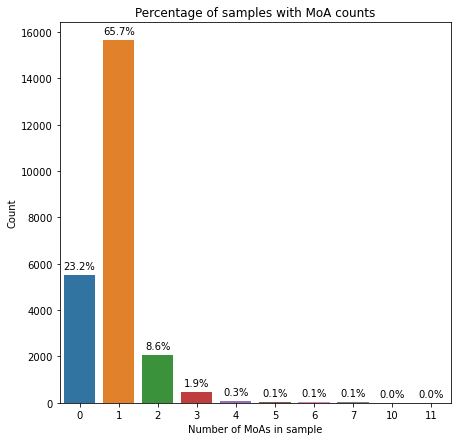

In [28]:
out = dict()
arr=pd.concat([scored.drop('sig_id',axis=1),non_scored.drop('sig_id',axis=1)],axis=1).values==1
for a in range(len(arr)):
    o=np.sum(arr[a])
    if o not in out.keys():
        out[o]=1
    else:
        out[o]+=1
length = 23814
plt.figure(figsize=(7,7))
splot = sns.barplot(x=list(out.keys()),y=list(out.values()))
for p in splot.patches:
    splot.annotate(format(p.get_height()*100/length, '.1f')+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Number of MoAs in sample')
plt.ylabel('Count')
plt.title('Percentage of samples with MoA counts')

In [29]:
genes = [col for col in train_features if col.startswith('g-')]
cells = [col for col in train_features if col.startswith('c-')]

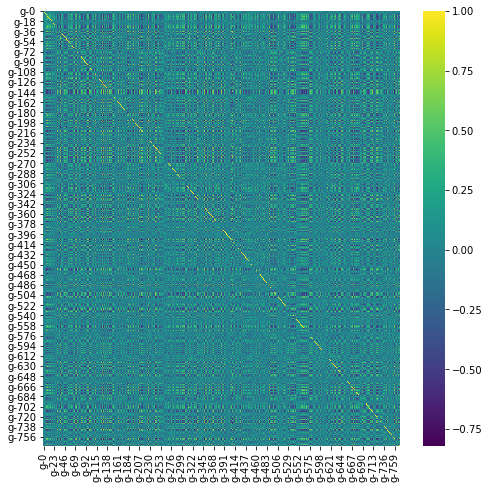

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(train_features.loc[:,genes].corr(),cmap='viridis')

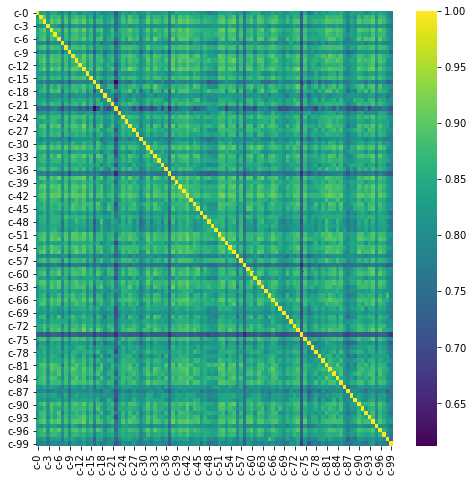

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(train_features.loc[:,cells].corr(),cmap='viridis')

In [32]:
cor = train_gs.corr()

In [33]:
df = pd.DataFrame(columns=['gene_a','gene_b','corr'])
for j in range(len(cor)):
    for i in range(len(cor)):
        if cor.iloc[i,j]<=-0.8 and cor.iloc[i,j]!=1.0:
            df = pd.concat([df,pd.DataFrame({'gene_a':[cor.columns[j]],'gene_b':[cor.columns[i]],'corr':[cor.iloc[i,j]]})],axis=0)
df

,gene_a,gene_b,corr
0,g-63,g-349,-0.806210
0,g-228,g-349,-0.820275
0,g-228,g-460,-0.807640
0,g-228,g-744,-0.808788
0,g-248,g-760,-0.809137
0,g-349,g-63,-0.806210
0,g-349,g-228,-0.820275
0,g-460,g-228,-0.807640
0,g-744,g-228,-0.808788
0,g-760,g-248,-0.809137


Text(0.5, 1.0, 'g-600')

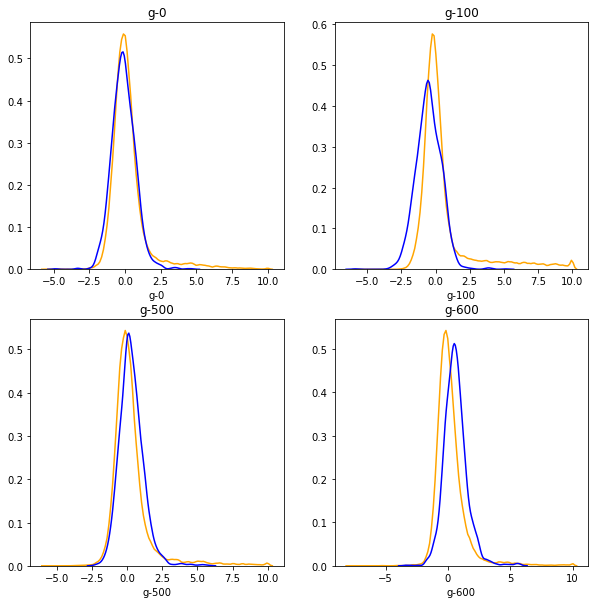

In [34]:
cp_1 = train_features[train_features['cp_type']=='trt_cp']
cp_2 = train_features[train_features['cp_type']!='trt_cp']
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(cp_1['g-0'],color='orange',hist=False)
sns.distplot(cp_2['g-0'],color='blue',hist=False)
plt.title('g-0')
plt.subplot(2,2,2)
sns.distplot(cp_1['g-100'],color='orange',hist=False)
sns.distplot(cp_2['g-100'],color='blue',hist=False)
plt.title('g-100')
plt.subplot(2,2,3)
sns.distplot(cp_1['g-500'],color='orange',hist=False)
sns.distplot(cp_2['g-500'],color='blue',hist=False)
plt.title('g-500')
plt.subplot(2,2,4)
sns.distplot(cp_1['g-600'],color='orange',hist=False)
sns.distplot(cp_2['g-600'],color='blue',hist=False)
plt.title('g-600')

Text(0.5, 1.0, 'c-50')

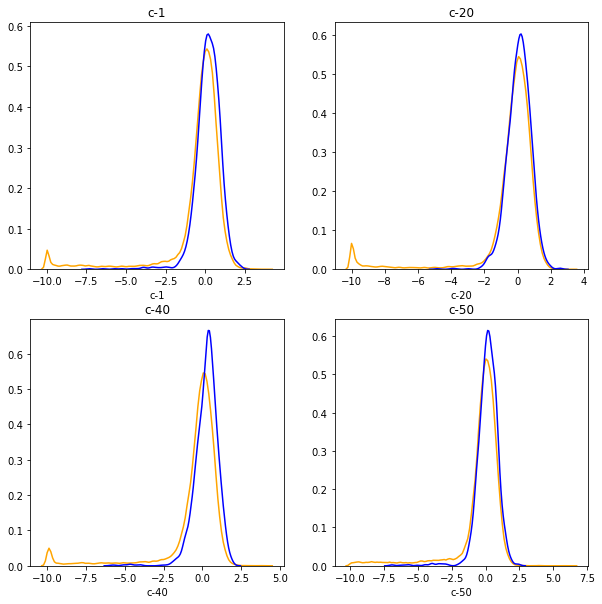

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(cp_1['c-1'],color='orange',hist=False)
sns.distplot(cp_2['c-1'],color='blue',hist=False)
plt.title('c-1')
plt.subplot(2,2,2)
sns.distplot(cp_1['c-20'],color='orange',hist=False)
sns.distplot(cp_2['c-20'],color='blue',hist=False)
plt.title('c-20')
plt.subplot(2,2,3)
sns.distplot(cp_1['c-40'],color='orange',hist=False)
sns.distplot(cp_2['c-40'],color='blue',hist=False)
plt.title('c-40')
plt.subplot(2,2,4)
sns.distplot(cp_1['c-50'],color='orange',hist=False)
sns.distplot(cp_2['c-50'],color='blue',hist=False)
plt.title('c-50')

Text(0.5, 1.0, 'g-600')

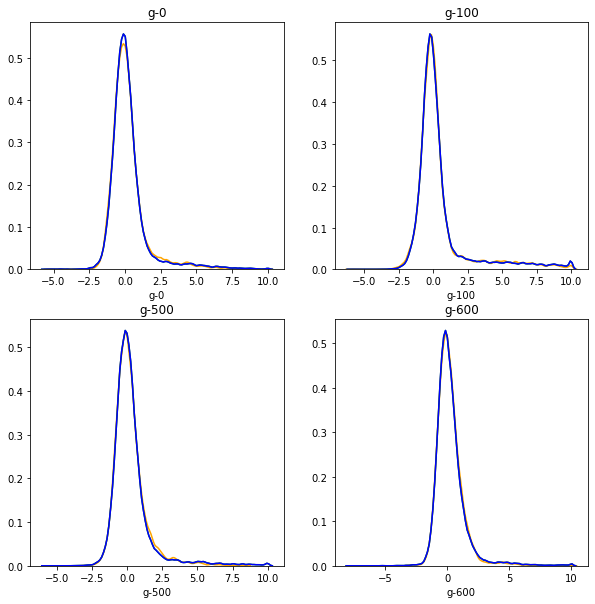

In [36]:
cp_1 = train_features[train_features['cp_time']==24]
cp_2 = train_features[train_features['cp_type']!=48]
cp_3 = train_features[train_features['cp_type']!=72]
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(cp_1['g-0'],color='orange',hist=False)
sns.distplot(cp_2['g-0'],color='green',hist=False)
sns.distplot(cp_3['g-0'],color='blue',hist=False)
plt.title('g-0')
plt.subplot(2,2,2)
sns.distplot(cp_1['g-100'],color='orange',hist=False)
sns.distplot(cp_2['g-100'],color='green',hist=False)
sns.distplot(cp_3['g-100'],color='blue',hist=False)
plt.title('g-100')
plt.subplot(2,2,3)
sns.distplot(cp_1['g-500'],color='orange',hist=False)
sns.distplot(cp_2['g-500'],color='green',hist=False)
sns.distplot(cp_3['g-500'],color='blue',hist=False)
plt.title('g-500')
plt.subplot(2,2,4)
sns.distplot(cp_1['g-600'],color='orange',hist=False)
sns.distplot(cp_2['g-600'],color='green',hist=False)
sns.distplot(cp_3['g-600'],color='blue',hist=False)
plt.title('g-600')

Text(0.5, 1.0, 'c-50')

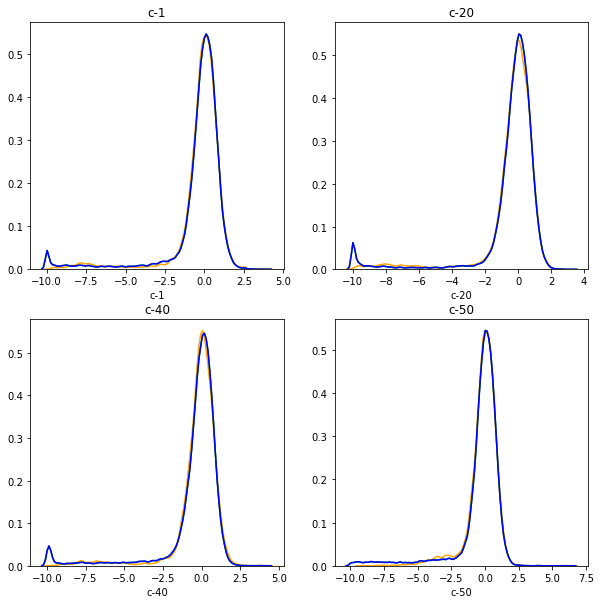

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(cp_1['c-1'],color='orange',hist=False)
sns.distplot(cp_2['c-1'],color='green',hist=False)
sns.distplot(cp_3['c-1'],color='blue',hist=False)
plt.title('c-1')
plt.subplot(2,2,2)
sns.distplot(cp_1['c-20'],color='orange',hist=False)
sns.distplot(cp_2['c-20'],color='green',hist=False)
sns.distplot(cp_3['c-20'],color='blue',hist=False)
plt.title('c-20')
plt.subplot(2,2,3)
sns.distplot(cp_1['c-40'],color='orange',hist=False)
sns.distplot(cp_2['c-40'],color='green',hist=False)
sns.distplot(cp_3['c-40'],color='blue',hist=False)
plt.title('c-40')
plt.subplot(2,2,4)
sns.distplot(cp_1['c-50'],color='orange',hist=False)
sns.distplot(cp_2['c-50'],color='green',hist=False)
sns.distplot(cp_3['c-50'],color='blue',hist=False)
plt.title('c-50')

Text(0.5, 1.0, 'g-600')

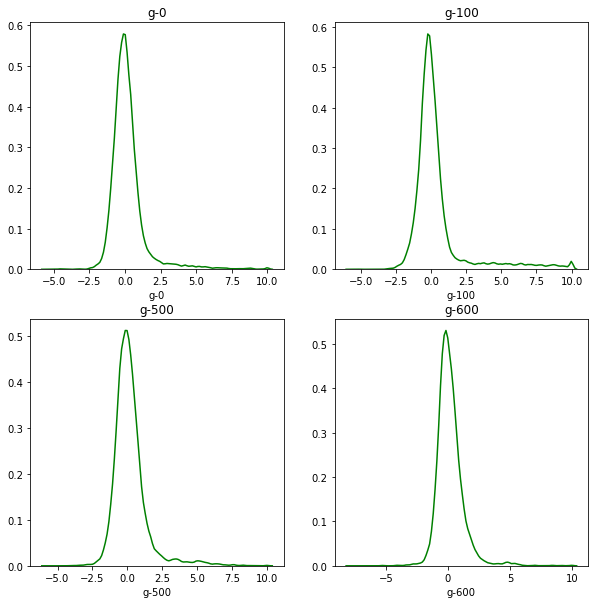

In [38]:
cp_1 = train_features[train_features['cp_dose']=='D0']
cp_2 = train_features[train_features['cp_dose']!='D1']
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(cp_1['g-0'],color='red',hist=False)
sns.distplot(cp_2['g-0'],color='green',hist=False)
plt.title('g-0')
plt.subplot(2,2,2)
sns.distplot(cp_1['g-100'],color='red',hist=False)
sns.distplot(cp_2['g-100'],color='green',hist=False)
plt.title('g-100')
plt.subplot(2,2,3)
sns.distplot(cp_1['g-500'],color='red',hist=False)
sns.distplot(cp_2['g-500'],color='green',hist=False)
plt.title('g-500')
plt.subplot(2,2,4)
sns.distplot(cp_1['g-600'],color='red',hist=False)
sns.distplot(cp_2['g-600'],color='green',hist=False)
plt.title('g-600')